# **Telco Customer Churn**

# Focused customer retention programs

About Dataset

Context

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents
Inspiration
To explore this type of models and learn more about the subject.

New version from IBM:

https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

# import require libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, minmax_scale,StandardScaler
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    RocCurveDisplay,accuracy_score
)
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv(r"C:\Users\hardi\Downloads\WA_Fn-UseC_-Telco-Customer-Churn (1).csv")

In [3]:
print("Top 10 rows :\n")

data.head(10)

Top 10 rows :



customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

In [4]:
print("Last 10 rows :\n")
data.tail(10)

Last 10 rows :



customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7033  9767-FFLEM    Male              0      No         No      38   
7034  0639-TSIQW  Female              0      No         No      67   
7035  8456-QDAVC    Male              0      No         No      19   
7036  7750-EYXWZ  Female              0      No         No      12   
7037  2569-WGERO  Female              0      No         No      72   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
7033          Yes                No     Fiber optic                   No  ...   
7034          Yes               Yes     Fiber optic                  Yes  ...   
7035          Yes                No     Fiber optic                   No  ...   
7036           No  No phone service             DSL                   No  ...   
7037          Yes                No              No  No internet service  ...   
7038          Yes               Yes             DSL                  Yes  ...   
7039          Yes               Yes     Fiber optic                   No  ...   
7040           No  No phone service             DSL                  Yes  ...   
7041          Yes               Yes     Fiber optic                   No  ...   
7042          Yes                No     Fiber optic                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
7033                   No                   No                   No   
7034                  Yes                   No                  Yes   
7035                   No                   No                  Yes   
7036                  Yes                  Yes                  Yes   
7037  No internet service  No internet service  No internet service   
7038                  Yes                  Yes                  Yes   
7039                  Yes                   No                  Yes   
7040                   No                   No                   No   
7041                   No                   No                   No   
7042                  Yes                  Yes                  Yes   

          StreamingMovies        Contract PaperlessBilling  \
7033                   No  Month-to-month              Yes   
7034                   No  Month-to-month              Yes   
7035                   No  Month-to-month              Yes   
7036                  Yes        One year               No   
7037  No internet service        Two year              Yes   
7038                  Yes        One year              Yes   
7039                  Yes        One year              Yes   
7040                   No  Month-to-month              Yes   
7041                   No  Month-to-month              Yes   
7042                  Yes        Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
7033    Credit card (automatic)          69.50       2625.25    No  
7034    Credit card (automatic)         102.95       6886.25   Yes  
7035  Bank transfer (automatic)          78.70        1495.1    No  
7036           Electronic check          60.65         743.3    No  
7037  Bank transfer (automatic)          21.15        1419.4    No  
7038               Mailed check          84.80        1990.5    No  
7039    Credit card (automatic)         103.20        7362.9    No  
7040           Electronic check          29.60        346.45    No  
7041               Mailed check          74.40         306.6   Yes  
7042  Bank transfer (automatic)         105.65        6844.5    No  

[10 rows x 21 columns]

In [5]:
Total_Rows = data.shape[0]
Total_Cols = data.shape[1]
print("Total Rows is :",Total_Rows)
print("Total columns is :", Total_Cols)

Total Rows is : 7043
Total columns is : 21


In [6]:
print( "\n Information about the Titanic dataset : \n " )
data.info()


 Information about the Titanic dataset : 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 1

# Columns distribution

In [7]:
feature_cols =  data.columns.tolist()
print("Total columns is here :\n", data.columns.tolist())

Total columns is here :
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [8]:
numerical_col = data.select_dtypes(include=["int64","float64"]).columns
print("Total Numerical columns list is here :\n", numerical_col)
print("\nTotal Numerical columns is here :\n" ,numerical_col.value_counts().sum())

Total Numerical columns list is here :
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

Total Numerical columns is here :
 3


In [9]:
categorical_col = data.select_dtypes(include=["O"]).columns
print("Total categorical columns  list is here :\n", categorical_col)
print("\nTotal categorical columns is here :\n" ,categorical_col.value_counts().sum())

Total categorical columns  list is here :
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

Total categorical columns is here :
 18


# basic statistics about the data :

In [10]:
data.describe().T

count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75

In [11]:
data.describe(include="all").T

count unique               top  freq       mean        std  \
customerID          7043   7043        7590-VHVEG     1        NaN        NaN   
gender              7043      2              Male  3555        NaN        NaN   
SeniorCitizen     7043.0    NaN               NaN   NaN   0.162147   0.368612   
Partner             7043      2                No  3641        NaN        NaN   
Dependents          7043      2                No  4933        NaN        NaN   
tenure            7043.0    NaN               NaN   NaN  32.371149  24.559481   
PhoneService        7043      2               Yes  6361        NaN        NaN   
MultipleLines       7043      3                No  3390        NaN        NaN   
InternetService     7043      3       Fiber optic  3096        NaN        NaN   
OnlineSecurity      7043      3                No  3498        NaN        NaN   
OnlineBackup        7043      3                No  3088        NaN        NaN   
DeviceProtection    7043      3                No  3095        NaN        NaN   
TechSupport         7043      3                No  3473        NaN        NaN   
StreamingTV         7043      3                No  2810        NaN        NaN   
StreamingMovies     7043      3                No  2785        NaN        NaN   
Contract            7043      3    Month-to-month  3875        NaN        NaN   
PaperlessBilling    7043      2               Yes  4171        NaN        NaN   
PaymentMethod       7043      4  Electronic check  2365        NaN        NaN   
MonthlyCharges    7043.0    NaN               NaN   NaN  64.761692  30.090047   
TotalCharges        7043   6531                      11        NaN        NaN   
Churn               7043      2                No  5174        NaN        NaN   

                    min   25%    50%    75%     max  
customerID          NaN   NaN    NaN    NaN     NaN  
gender              NaN   NaN    NaN    NaN     NaN  
SeniorCitizen       0.0   0.0    0.0    0.0     1.0  
Partner             NaN   NaN    NaN    NaN     NaN  
Dependents          NaN   NaN    NaN    NaN     NaN  
tenure              0.0   9.0   29.0   55.0    72.0  
PhoneService        NaN   NaN    NaN    NaN     NaN  
MultipleLines       NaN   NaN    NaN    NaN     NaN  
InternetService     NaN   NaN    NaN    NaN     NaN  
OnlineSecurity      NaN   NaN    NaN    NaN     NaN  
OnlineBackup        NaN   NaN    NaN    NaN     NaN  
DeviceProtection    NaN   NaN    NaN    NaN     NaN  
TechSupport         NaN   NaN    NaN    NaN     NaN  
StreamingTV         NaN   NaN    NaN    NaN     NaN  
StreamingMovies     NaN   NaN    NaN    NaN     NaN  
Contract            NaN   NaN    NaN    NaN     NaN  
PaperlessBilling    NaN   NaN    NaN    NaN     NaN  
PaymentMethod       NaN   NaN    NaN    NaN     NaN  
MonthlyCharges    18.25  35.5  70.35  89.85  118.75  
TotalCharges        NaN   NaN    NaN    NaN     NaN  
Churn               NaN   NaN    NaN    NaN     NaN

In [12]:
data.describe(include="O").T

count unique               top  freq
customerID        7043   7043        7590-VHVEG     1
gender            7043      2              Male  3555
Partner           7043      2                No  3641
Dependents        7043      2                No  4933
PhoneService      7043      2               Yes  6361
MultipleLines     7043      3                No  3390
InternetService   7043      3       Fiber optic  3096
OnlineSecurity    7043      3                No  3498
OnlineBackup      7043      3                No  3088
DeviceProtection  7043      3                No  3095
TechSupport       7043      3                No  3473
StreamingTV       7043      3                No  2810
StreamingMovies   7043      3                No  2785
Contract          7043      3    Month-to-month  3875
PaperlessBilling  7043      2               Yes  4171
PaymentMethod     7043      4  Electronic check  2365
TotalCharges      7043   6531                      11
Churn             7043      2                No  5174

<Figure size 1000x600 with 0 Axes>

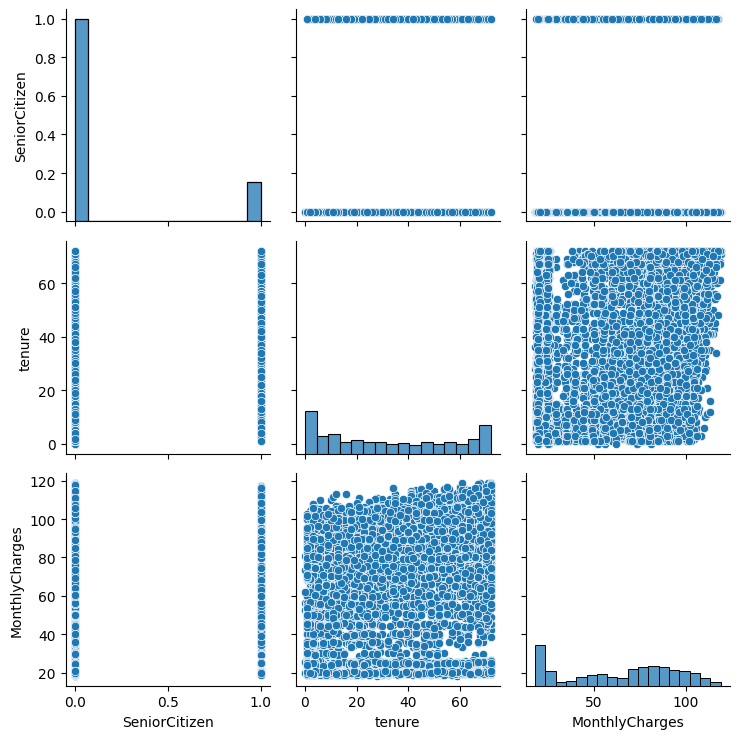

In [13]:
plt.figure(figsize=(10,6))
sns.pairplot(data)
plt.tight_layout()
plt.show()

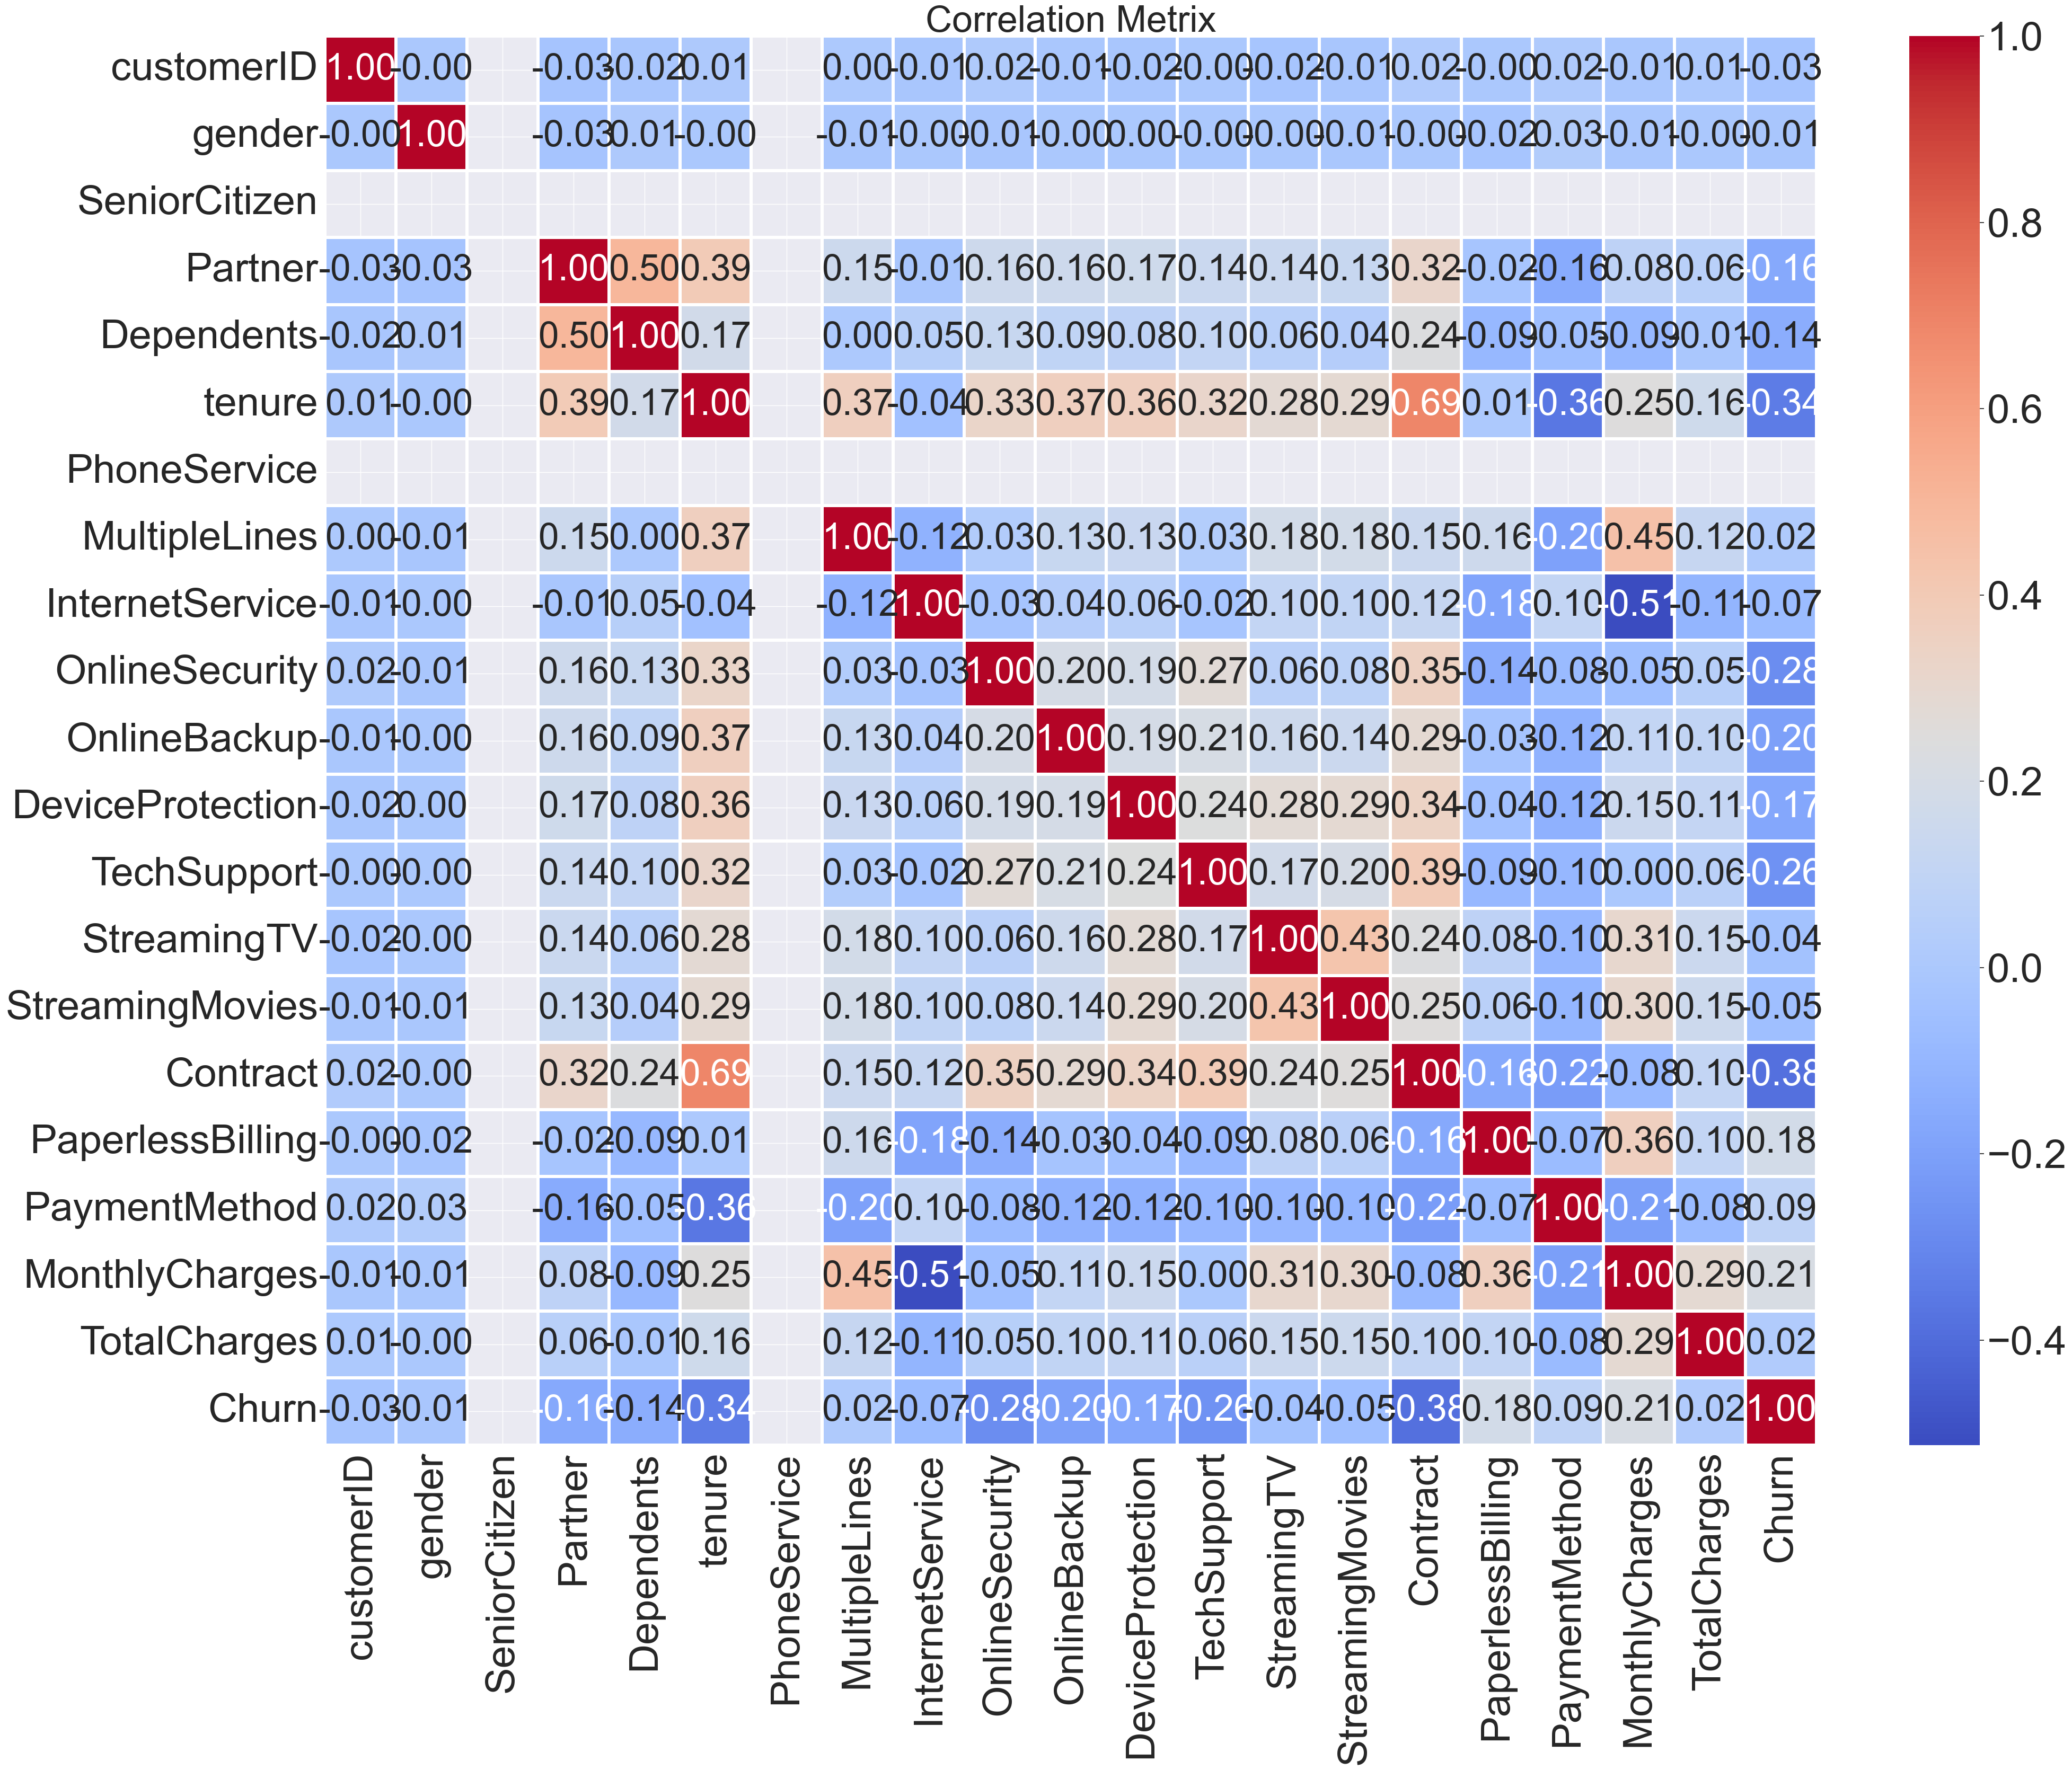

In [37]:
correlation = data.corr(numeric_only=True)

plt.figure(figsize=(43,35))
sns.set(font_scale=5.0)
sns.heatmap(correlation ,linewidths="4" ,annot=True ,cmap="coolwarm",       
            annot_kws={"size": 50}, fmt=".2f",)
plt.title("Correlation Metrix" , fontsize=50)
plt.tight_layout()
plt.show()

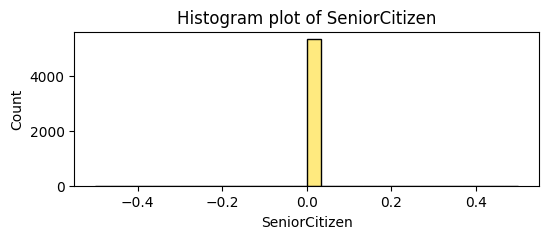

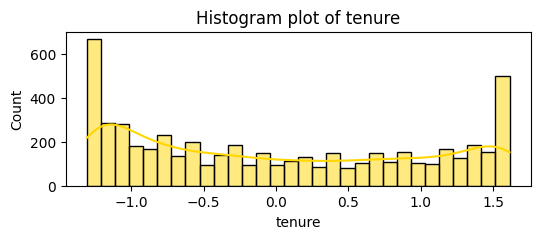

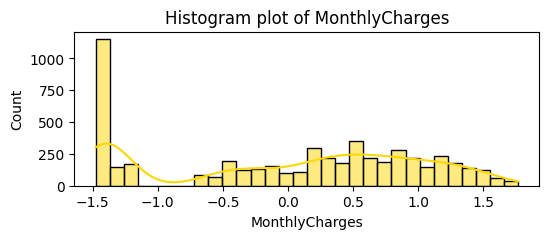

In [33]:
# Histograms each numerical col

for col in numerical_col:
    plt.figure(figsize=(6,2))
    sns.histplot(x=data[col],color="gold",kde=True ,bins=30)
    plt.title(f"Histogram plot of {col}")
    plt.show()

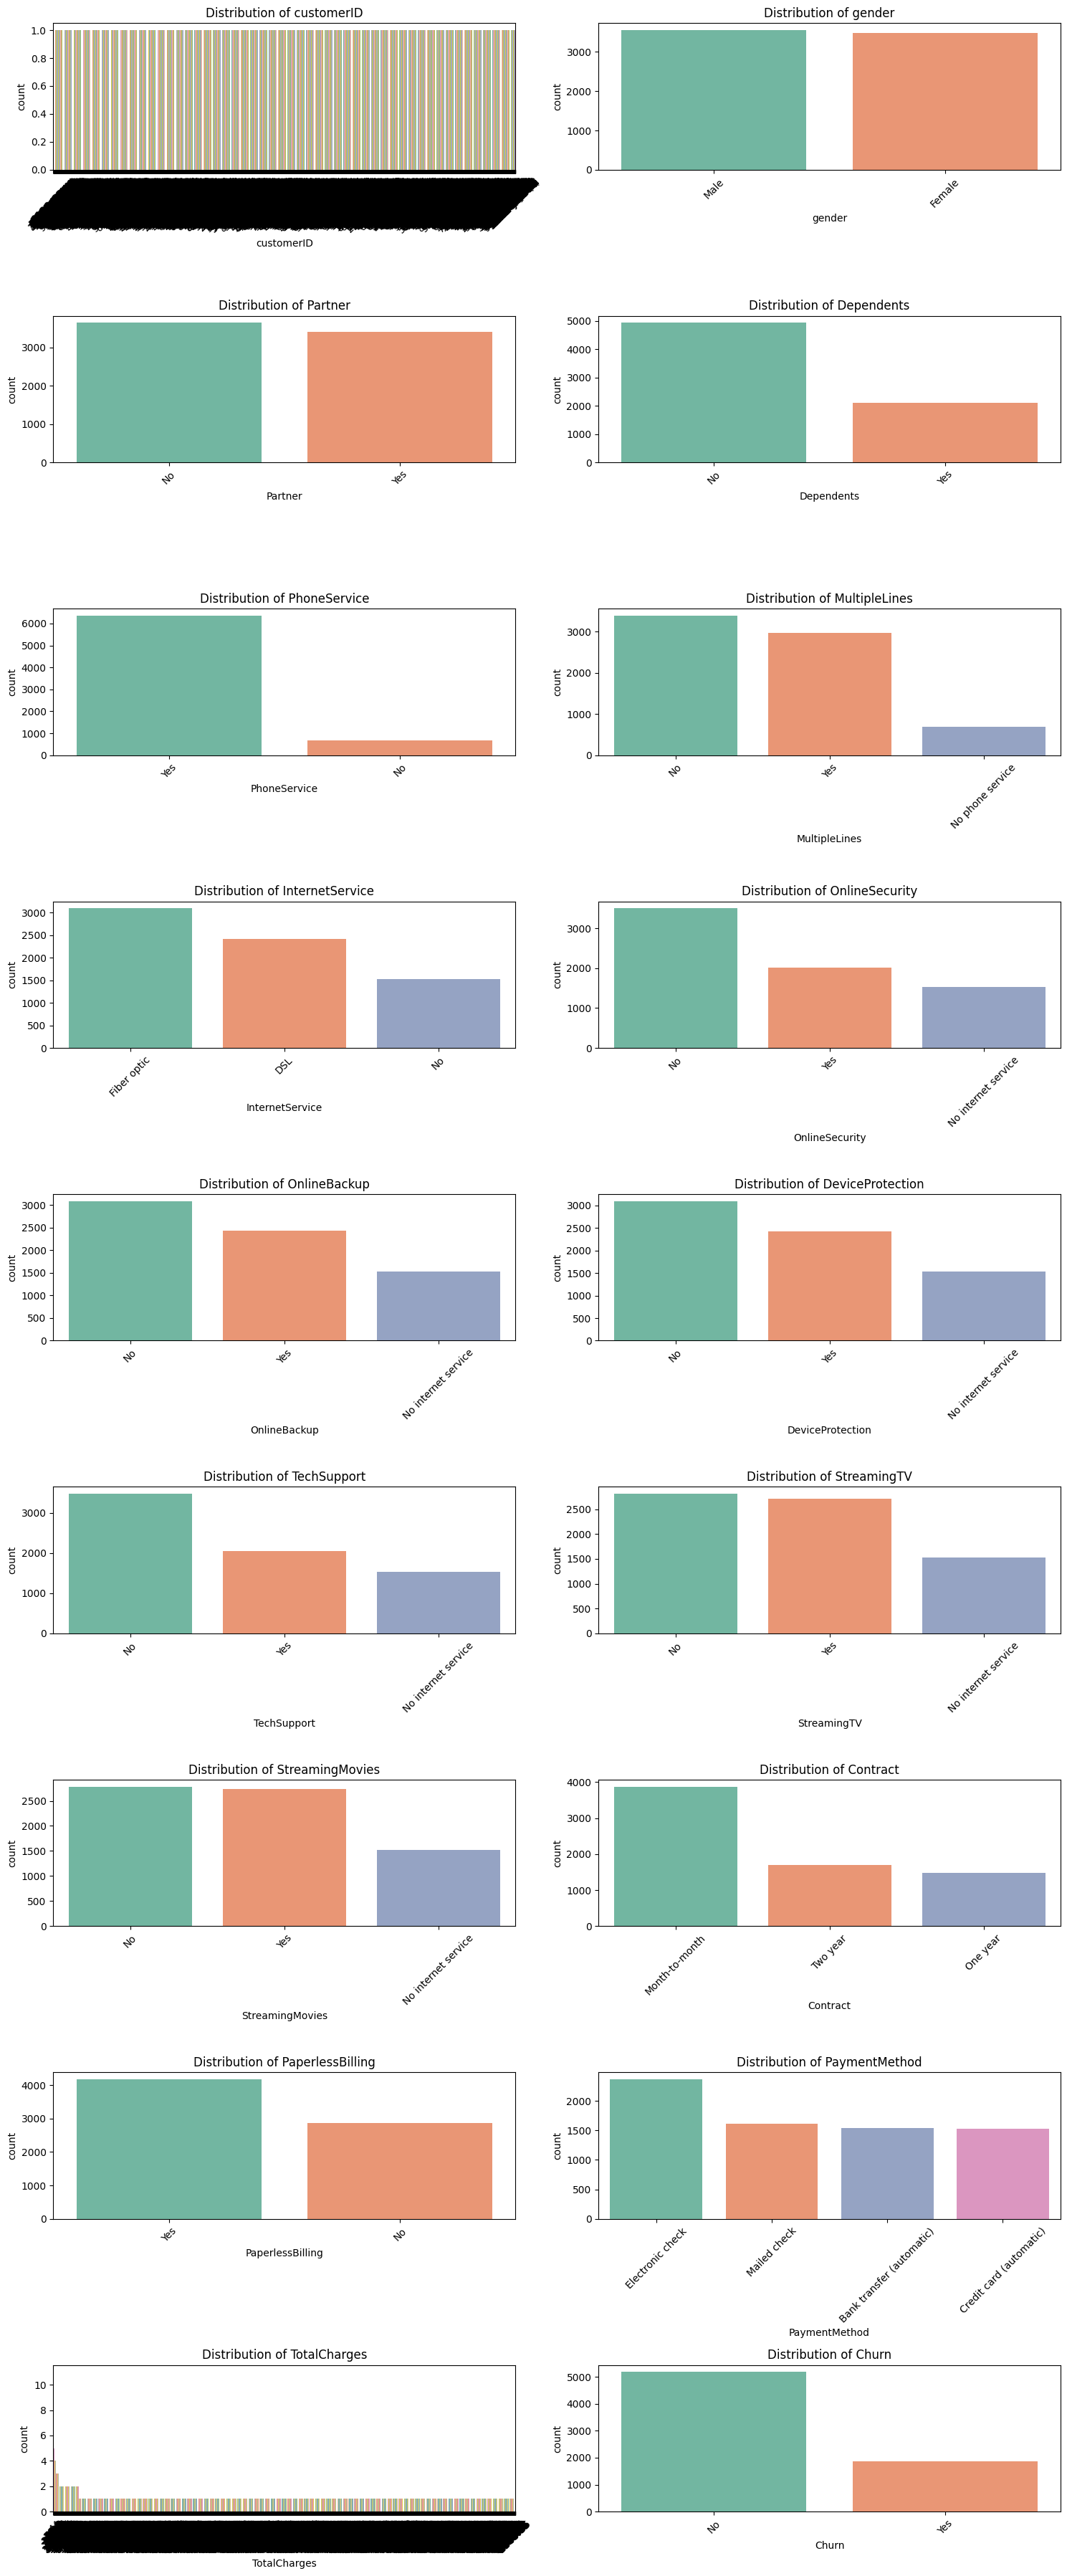

In [16]:
plt.figure(figsize=(15, len(categorical_col)*4))

for i, col in enumerate(categorical_col, 1):
    plt.subplot(len(categorical_col), 2, i)
    sns.countplot(data=data, x=col, palette="Set2", order=data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

<Axes: xlabel='Churn', ylabel='count'>

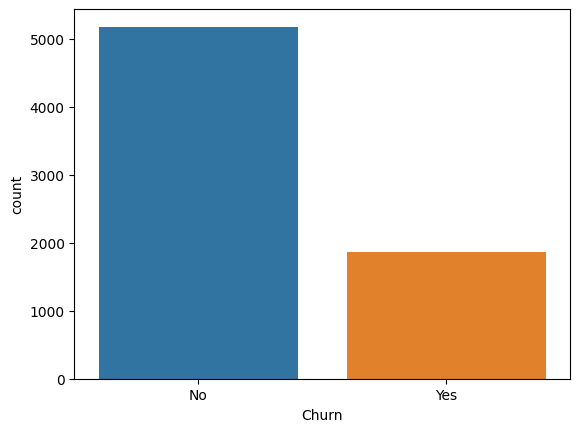

In [17]:
sns.countplot(data=data, x=col, hue="Churn")


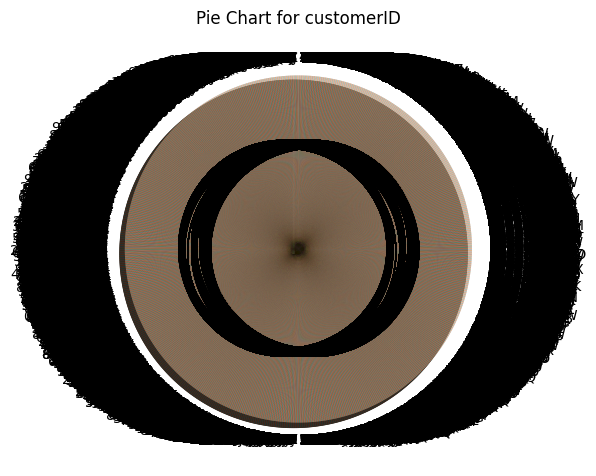

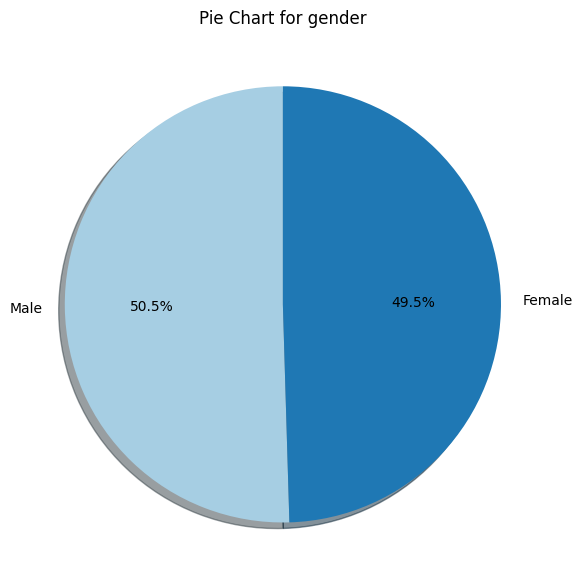

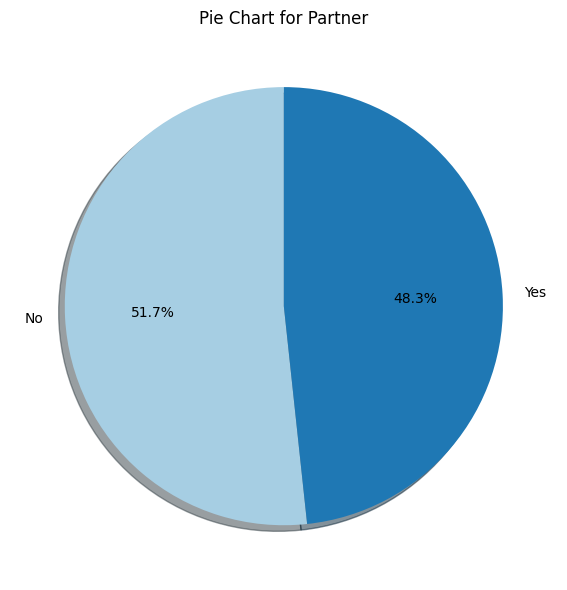

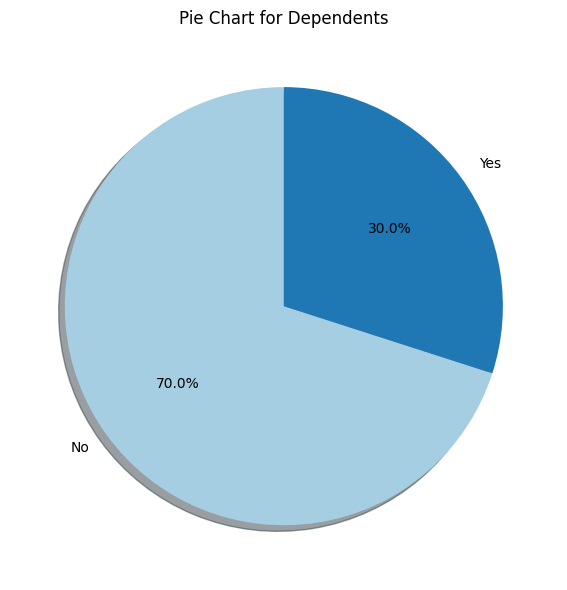

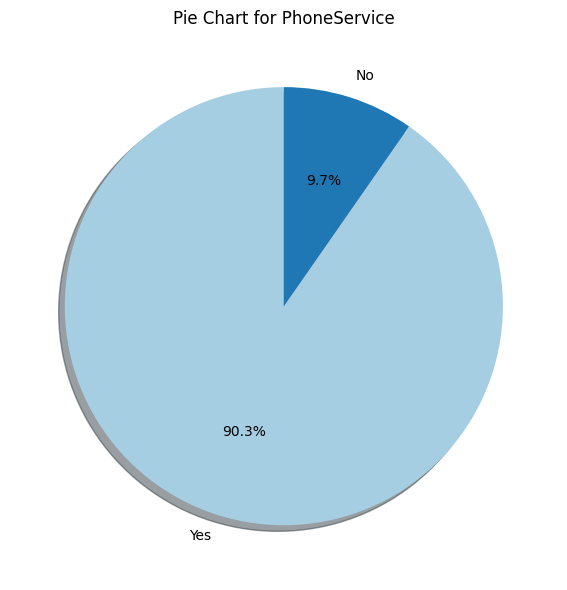

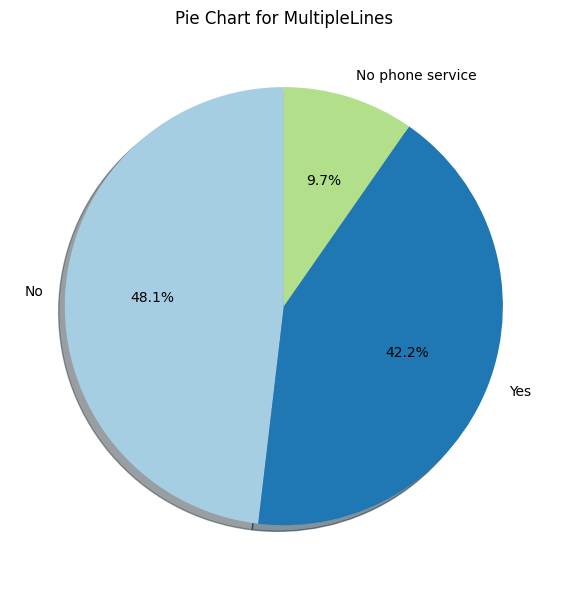

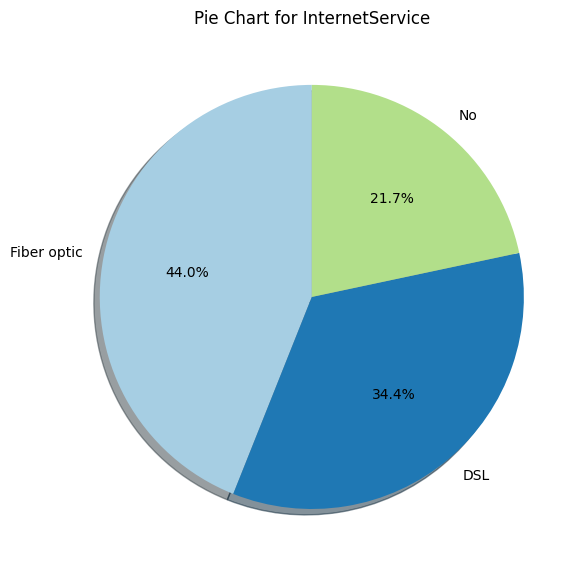

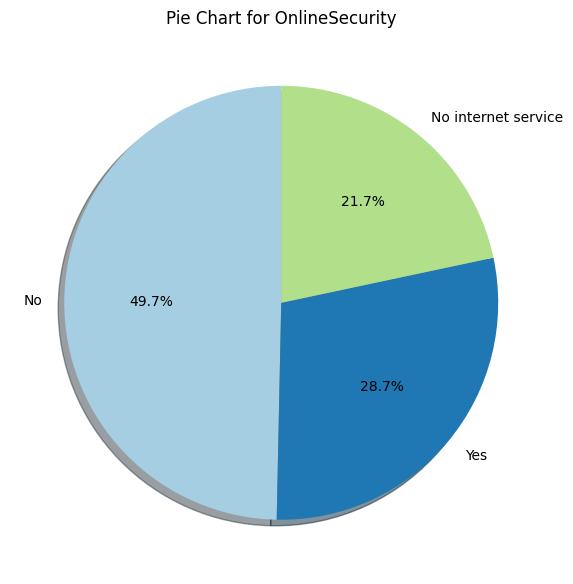

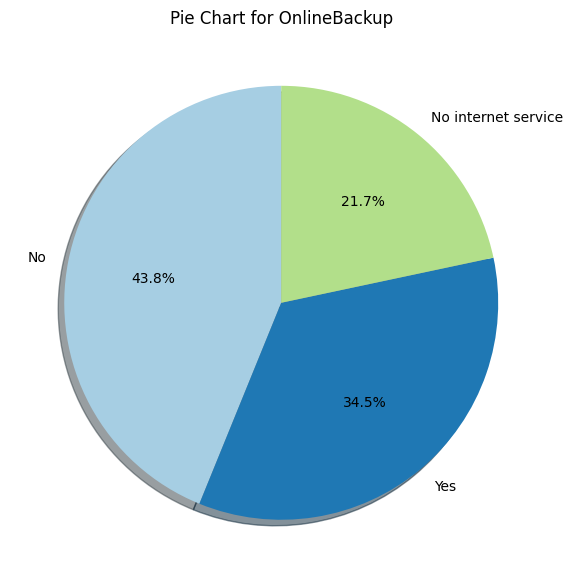

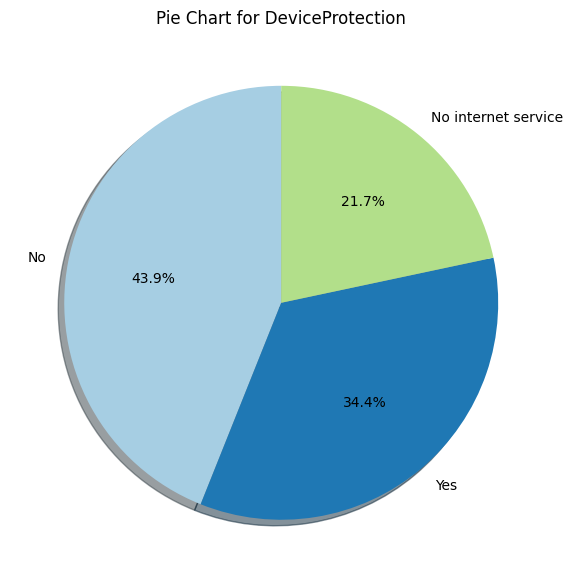

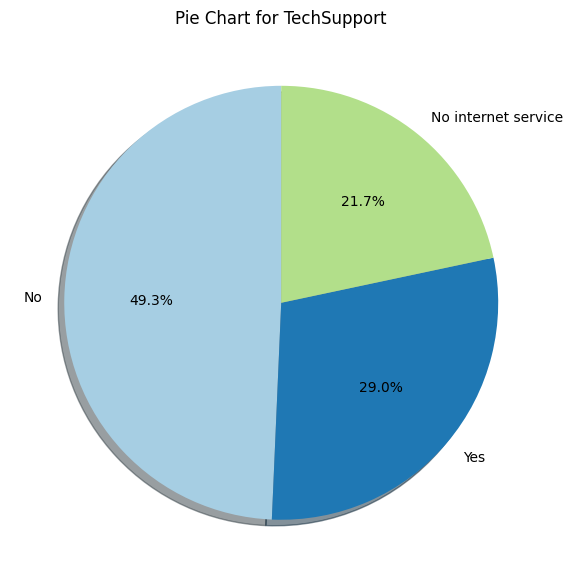

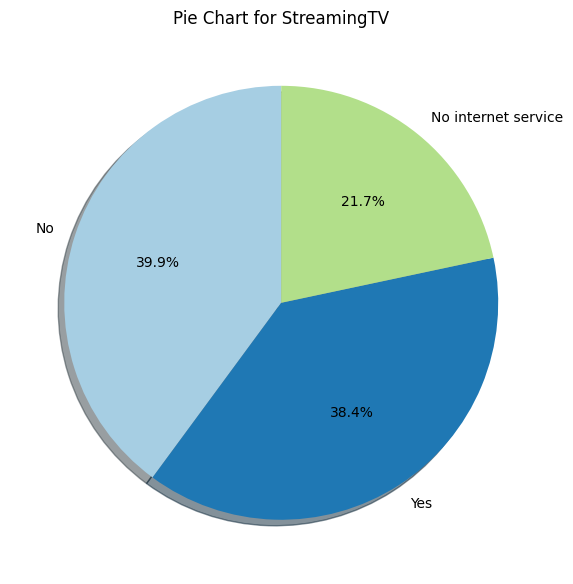

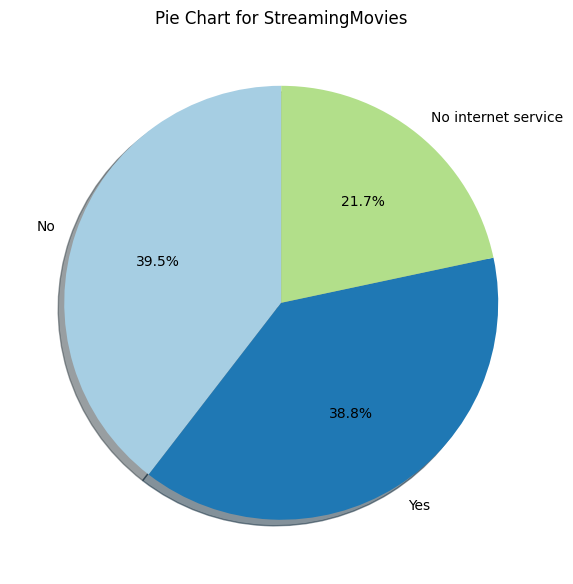

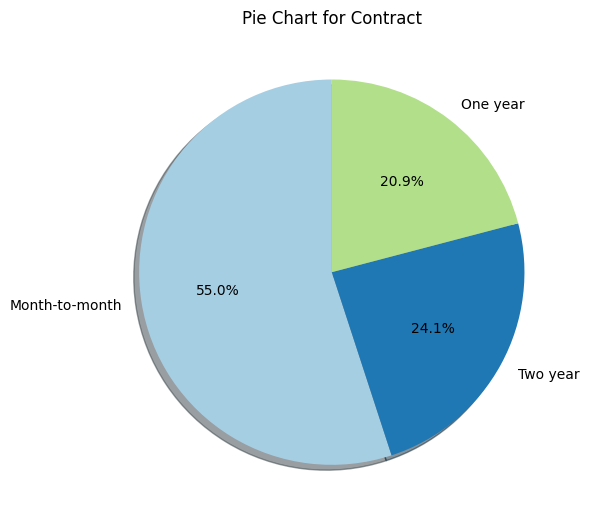

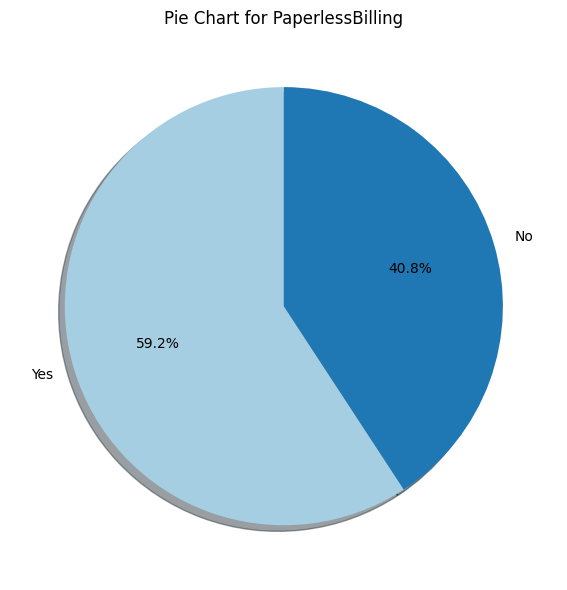

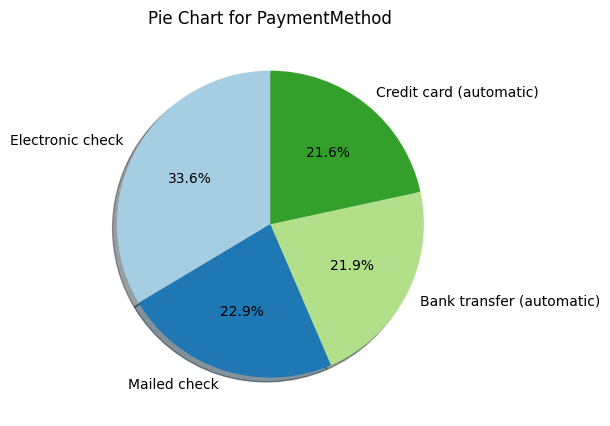

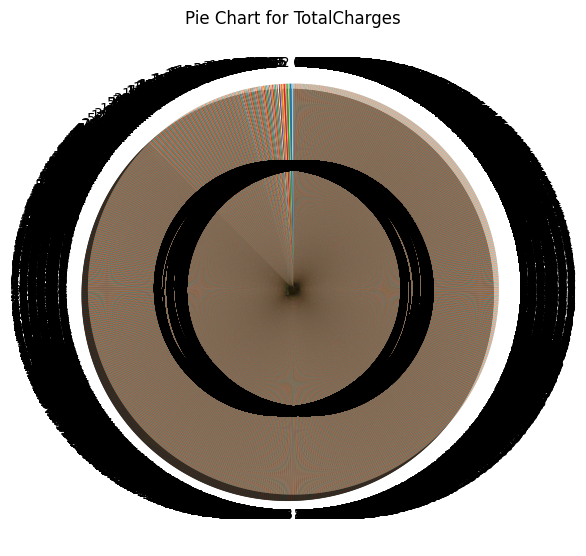

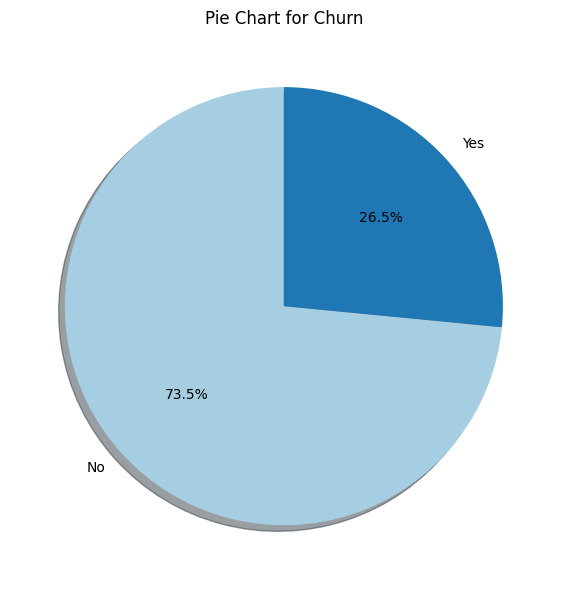

In [18]:
for col in categorical_col:
    plt.figure(figsize=(6, 6))
    data[col].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        colors=plt.cm.Paired.colors
    )
    plt.title(f"Pie Chart for {col}")
    plt.ylabel('') 
    plt.tight_layout()
    plt.show()

# Preprocessing :

# 1. Handle null values:

In [19]:
data.drop(["customerID"], axis=1)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0                 Yes           Electronic check           29.85        29.85   
1                  No               Mailed check           56.95       1889.5   
2                 Yes               Mailed check           53.85       108.15   
3                  No  Bank transfer (automatic)           42.30      1840.75   
4                 Yes           Electronic check           70.70       151.65   
...               ...                        ...             ...          ...   
7038              Yes               Mailed check           84.80       1990.5   
7039              Yes    Credit card (automatic)          103.20       7362.9   
7040              Yes           Electronic check           29.60       346.45   
7041              Yes               Mailed check           74.40        306.6   
7042              Yes  Bank transfer (automatic)          105.65       6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 20 columns]

In [20]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 2. Handle categorical cloumns

In [21]:
for i in categorical_col:
    lb = LabelEncoder()
    data[i] = lb.fit_transform(data[i])

categorical_col_update = data.select_dtypes(include=["O"]).columns
print(categorical_col_update)
print(data)

Index([], dtype='object')
      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           5375       0              0        1           0       1   
1           3962       1              0        0           0      34   
2           2564       1              0        0           0       2   
3           5535       1              0        0           0      45   
4           6511       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038        4853       1              0        1           1      24   
7039        1525       0              0        1           1      72   
7040        3367       0              0        1           1      11   
7041        5934       1              1        1           0       4   
7042        2226       1              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0                0              1 

# 3. detect Outlines and Remove

In [22]:
target_column = "Churn"
numeric_cols = data.select_dtypes(include=np.number).columns.drop(target_column)

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower) & (data[col] <= upper)]

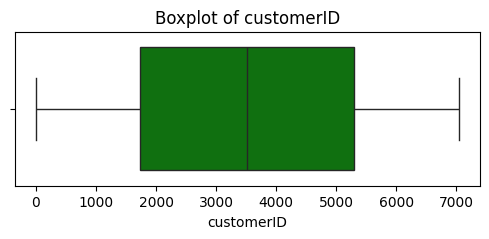

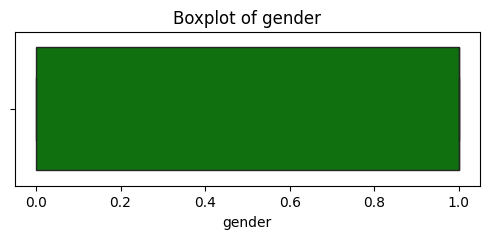

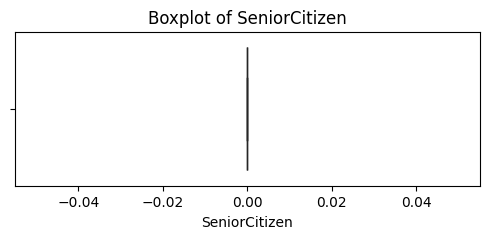

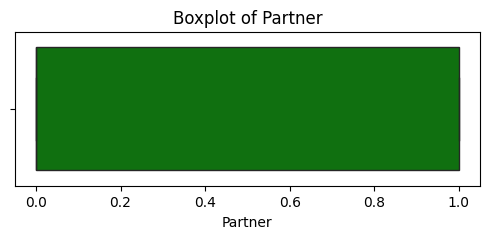

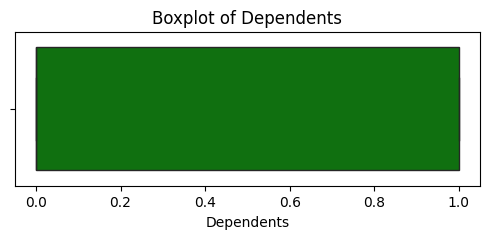

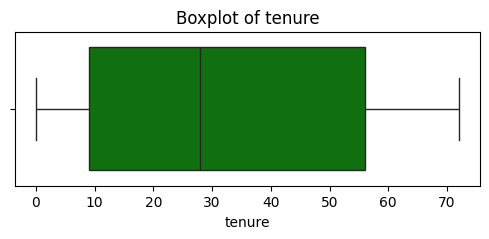

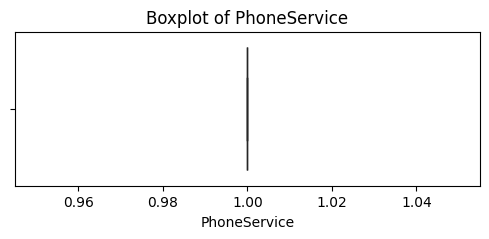

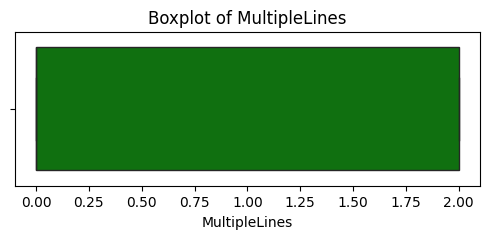

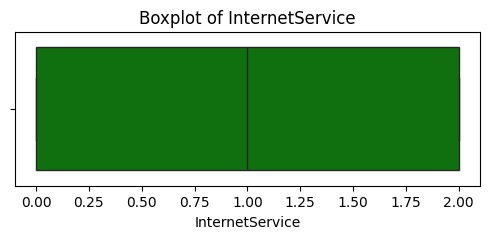

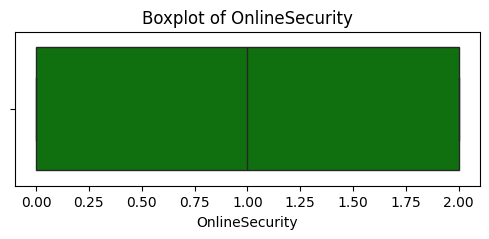

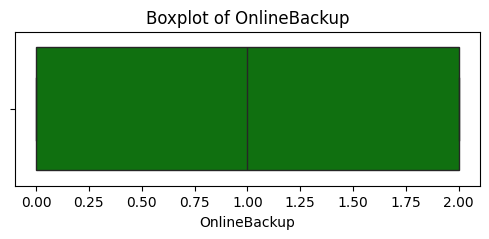

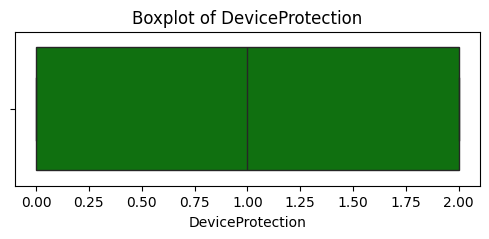

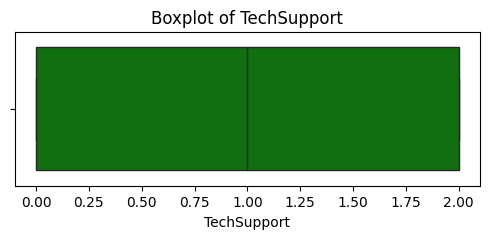

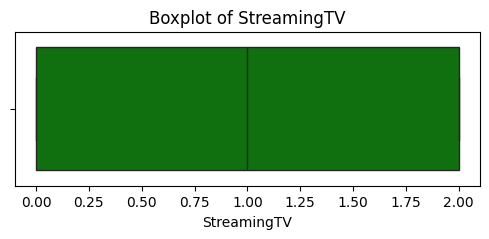

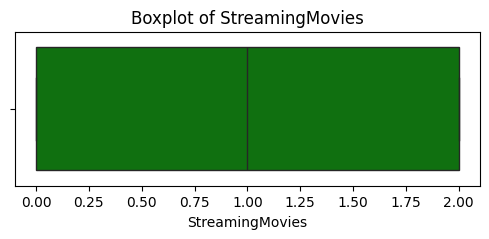

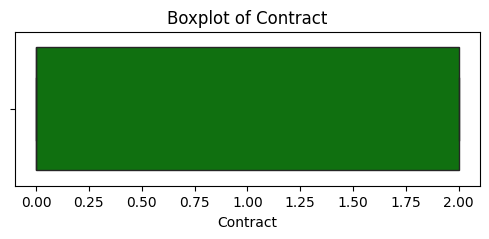

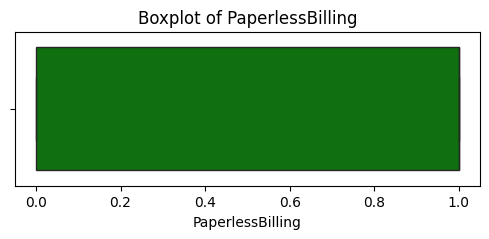

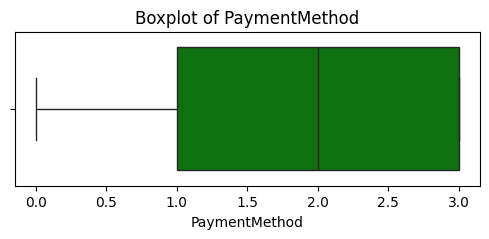

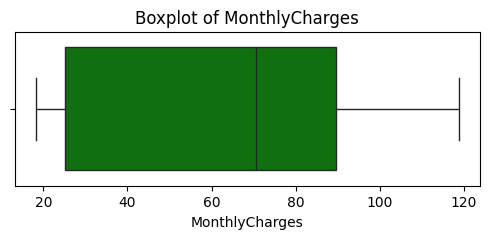

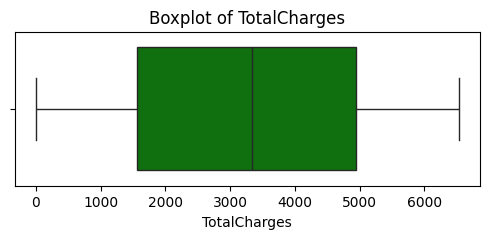

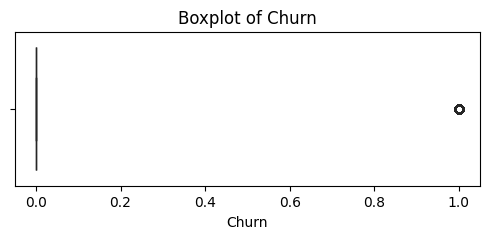

In [23]:

for col in data:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=data[col],color="green")
    plt.title(f"Boxplot of {col}")
    plt.show()
    

# 4. Features Scaling

In [24]:
scaler = StandardScaler()
 
data[numerical_col] = scaler.fit_transform(data[numerical_col])

# 5. Split into features and target col

In [25]:
x = data.drop(columns=["Churn"] , axis=1)
y = data.Churn

from sklearn.model_selection import train_test_split

x_train,x_test,y_train ,y_test = train_test_split(x,y,test_size=0.2 ,random_state=42)

# Applying to Optuna

In [26]:


def objective(trial):
    try:
        params = {
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "n_estimators": trial.suggest_int("n_estimators", 50, 500),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 10)
        }
        model = RandomForestClassifier(**params, random_state=42)
        score = cross_val_score(model, x_train, y_train, cv=3, scoring="accuracy").mean()
        return score
    except Exception as e:
        print("Trial failed:", e)
        return 0.0

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

best_params = study.best_params
final_rf = RandomForestClassifier(**best_params, random_state=42)
final_rf.fit(x_train, y_train)


[I 2025-06-10 11:25:19,738] A new study created in memory with name: no-name-14616425-ff30-4ae5-b49e-4533be3a6942
[I 2025-06-10 11:25:20,393] Trial 0 finished with value: 0.8092995133119602 and parameters: {'max_depth': 7, 'n_estimators': 97, 'min_samples_split': 10}. Best is trial 0 with value: 0.8092995133119602.
[I 2025-06-10 11:25:22,117] Trial 1 finished with value: 0.8064812884825988 and parameters: {'max_depth': 6, 'n_estimators': 259, 'min_samples_split': 2}. Best is trial 0 with value: 0.8092995133119602.
[I 2025-06-10 11:25:25,743] Trial 2 finished with value: 0.8076553282580141 and parameters: {'max_depth': 8, 'n_estimators': 466, 'min_samples_split': 5}. Best is trial 0 with value: 0.8092995133119602.
[I 2025-06-10 11:25:27,655] Trial 3 finished with value: 0.8062462158433333 and parameters: {'max_depth': 7, 'n_estimators': 276, 'min_samples_split': 4}. Best is trial 0 with value: 0.8092995133119602.
[I 2025-06-10 11:25:30,040] Trial 4 finished with value: 0.80671619569425 

RandomForestClassifier(max_depth=7, min_samples_split=10, n_estimators=97,
                       random_state=42)

In [27]:
# FINAL MODEL TRAINING
final_rf = RandomForestClassifier(**best_params, random_state=42)
final_rf.fit(x_train, y_train)
y_pred = final_rf.predict(x_test)
y_proba = final_rf.predict_proba(x_test)[0:,1]


# 3️ CONFUSION MATRIX

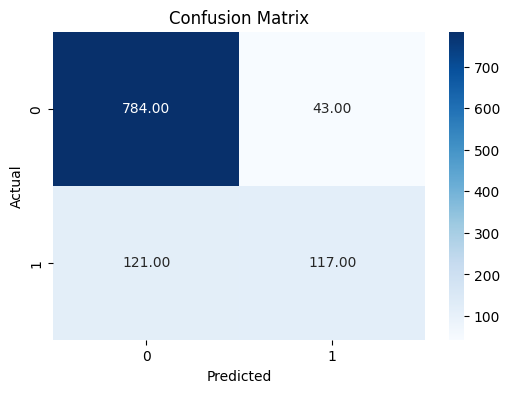

In [28]:

plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
print("\n Accuracy is :",accuracy_score(y_test,y_pred))


 Accuracy is : 0.8460093896713615


In [30]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       827
           1       0.73      0.49      0.59       238

    accuracy                           0.85      1065
   macro avg       0.80      0.72      0.75      1065
weighted avg       0.84      0.85      0.83      1065



# ROC CURVE

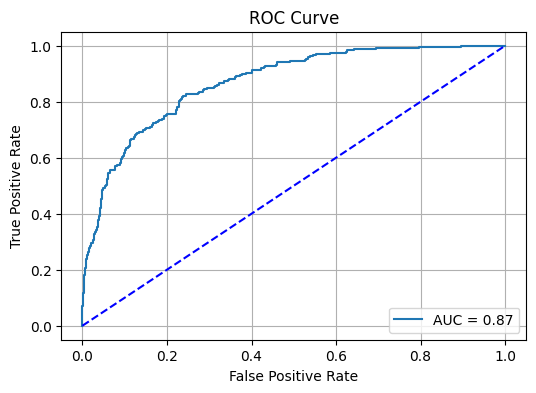

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="Blue")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


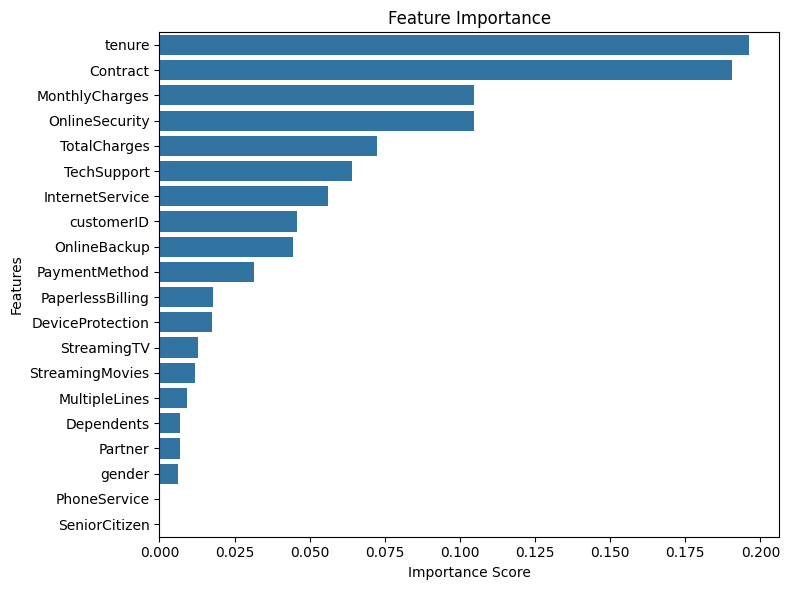

In [32]:
# FEATURE IMPORTANCE

importances = final_rf.feature_importances_
features = x_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Thank you